### Import libraries

In [1]:
import os
import sys
import pandas as pd
import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore') 
#import xlsxwriter
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta


In [3]:
import pandas_gbq

In [5]:
# query_bq="SELECT distinct display_name FROM `data-team-318806.books_db.books`"

In [7]:
query_bq="SELECT display_name \
,SPLIT(display_name, ' ')[OFFSET(0)] AS counterparty \
,SPLIT(display_name, ' ')[OFFSET(1)] AS country \
,SPLIT(display_name, ' ')[OFFSET(2)] AS month_text \
,SPLIT(display_name, ' ')[OFFSET(3)] AS year \
,current_balance \
,phone_flag \
,phone_val \
,email_flag \
,email_val \
,dpd \
,dca_placement \
, paid_last_12_months \
,ak_id \
FROM `data-team-318806.books_db.books` \
where 1=1 \
and lower(display_name) like '%moneyspot%' \
and lower(display_name) like '%au%' \
and lower(display_name) not like '%backbook%'"

In [9]:
df = pandas_gbq.read_gbq(query_bq
                        ,project_id="data-team-318806")


Downloading: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████|


In [11]:
df.tail()

,display_name,counterparty,country,month_text,year,current_balance,phone_flag,phone_val,email_flag,email_val,dpd,dca_placement,paid_last_12_months,ak_id
51579,MoneySpot AU June 2023,MoneySpot,AU,June,2023,2602.66,1,1,1,1,78,0,1,ab3997ec-27e5-46c7-b734-5093f2f113b9
51580,MoneySpot AU June 2023,MoneySpot,AU,June,2023,516.34,1,1,1,1,56,0,1,cfb234b1-1a82-41e1-acb1-edc551a6ee03
51581,MoneySpot AU June 2023,MoneySpot,AU,June,2023,1385.69,1,1,1,1,44,0,1,16b4e1cd-6b82-48fd-abcd-c88c96b42a25
51582,MoneySpot AU June 2023,MoneySpot,AU,June,2023,431.63,1,1,1,1,42,0,1,5c16070f-3bda-40e4-98ce-678d3850512d
51583,MoneySpot AU June 2023,MoneySpot,AU,June,2023,2781.86,1,1,1,1,58,0,1,50f6ec5b-3fdf-4d2d-8f84-19ca87be4d61


In [12]:
df.shape

(50704, 14)

In [13]:
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'June':6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

In [14]:
df['month_number'] = df['month_text'].map(month_mapping)

In [15]:
df['month_number']=df['month_number'].astype(int)

In [16]:
df['year']=df['year'].astype(int)

In [17]:
df['yearmonth']=df['year'].astype(int)*100+df['month_number'].astype(int)

In [18]:
df['year'].unique()

array([2024, 2023, 2022])

In [19]:
df['year_month_date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month_number'].astype(str) + '-01')

In [20]:

# df['yearmonth_v1'] = pd.to_datetime(df.assign(day=1).loc[:, ['year', 'month_number', 'day']])

In [21]:
df.head()

,display_name,counterparty,country,month_text,year,current_balance,phone_flag,phone_val,email_flag,email_val,dpd,dca_placement,paid_last_12_months,ak_id,month_number,yearmonth,year_month_date
0,MoneySpot AU Aug 2024,MoneySpot,AU,Aug,2024,3880.22,1,1,1,1,74,0,0,927f470c-2a2d-4337-a4d1-7170cf0f4fb7,8,202408,2024-08-01
1,MoneySpot AU Aug 2024,MoneySpot,AU,Aug,2024,2821.06,1,1,1,1,84,0,0,41325cd9-37c0-45ac-98bf-6767aa890fab,8,202408,2024-08-01
2,MoneySpot AU Aug 2024,MoneySpot,AU,Aug,2024,3020.01,1,1,1,1,126,0,0,5bb14c53-ba4a-4432-b8de-314ec0092e51,8,202408,2024-08-01
3,MoneySpot AU Aug 2024,MoneySpot,AU,Aug,2024,2909.85,1,1,1,1,97,0,0,2bd703ce-629d-4abe-a3b1-9d694bf2e0e8,8,202408,2024-08-01
4,MoneySpot AU Aug 2024,MoneySpot,AU,Aug,2024,5492.78,1,1,1,1,80,0,0,c057b283-6f83-40a7-aa82-923bfc3b1504,8,202408,2024-08-01


In [22]:
#####Analysis on current_balance

In [23]:
df_cur_balance=df.groupby('year_month_date')[['current_balance']].sum().reset_index().copy()

In [24]:
df_cur_balance.head()

,year_month_date,current_balance
0,2022-09-01,1654770.80
1,2022-10-01,1995610.34
2,2022-11-01,1863655.12
3,2022-12-01,2402279.62
4,2023-01-01,2785640.83


In [25]:
df_cur_balance.shape

(24, 2)

In [26]:
df_average = df_cur_balance['current_balance'].mean()

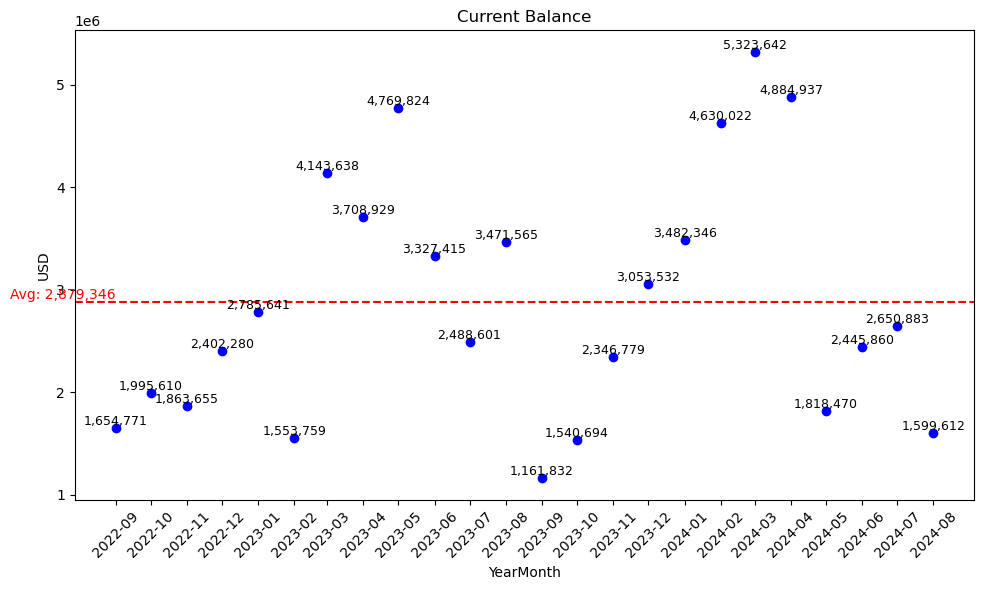

In [27]:
plt.figure(figsize=(10, 6))  # Make the figure wider
plt.scatter(df_cur_balance['year_month_date'], df_cur_balance['current_balance'], color='blue')

# Add labels and title
plt.xlabel('YearMonth')
plt.ylabel('USD')
plt.title('Current Balance')

# Rotate x-axis labels for better readability (optional)

x_labels = df_cur_balance['year_month_date'].dt.strftime('%Y-%m-%d')  # Format as string
short_x_labels = x_labels.str.slice(0, 7)  # Get the first 6 letters

plt.xticks(df_cur_balance['year_month_date'], short_x_labels, rotation=45)


# Annotate each point with its y-value (current_balance)
for i, value in enumerate(df_cur_balance['current_balance']):
    plt.text(df_cur_balance['year_month_date'][i], df_cur_balance['current_balance'][i], 
             f'{value:,.0f}', ha='center', va='bottom', fontsize=9)


plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average DPD: {df_average:,.0f}')

plt.text(df_cur_balance['year_month_date'].min(), df_average, f'Avg: {df_average:,.0f}', 
         color='red', va='bottom', ha='right', fontsize=10)

# Show plot
plt.tight_layout()  # To make sure labels are not cut off
plt.show()

In [28]:
###without normalization, no trend, or seasonality

In [29]:
#### Average Balance

In [30]:
df_cur_balance_avg=df.groupby('year_month_date')[['current_balance']].mean().reset_index().copy()

In [31]:
df_average = df_cur_balance_avg['current_balance'].mean()

In [32]:
df_average

1388.8823015117314

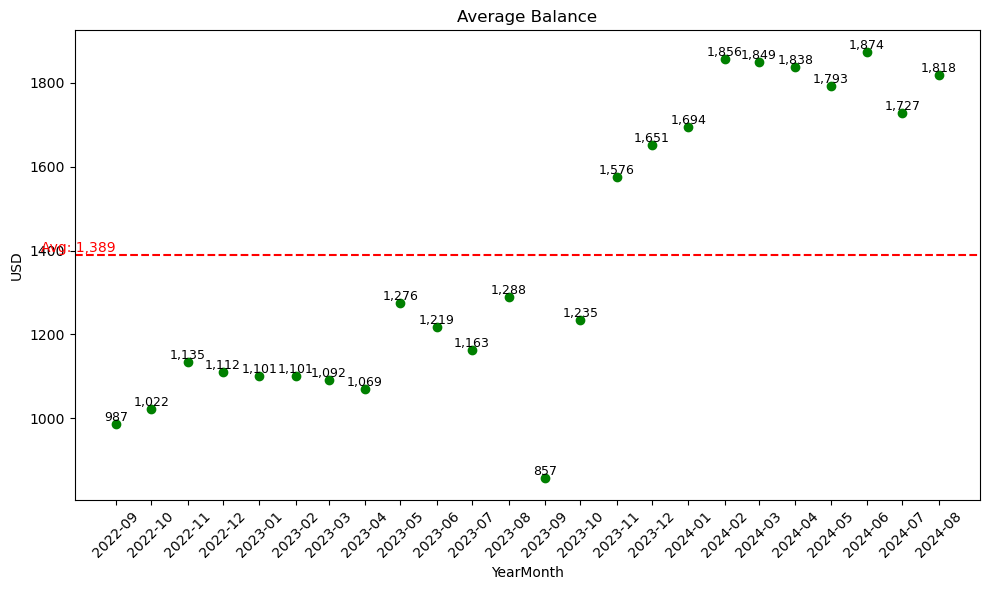

In [33]:
plt.figure(figsize=(10, 6))  # Make the figure wider
plt.scatter(df_cur_balance_avg['year_month_date'], df_cur_balance_avg['current_balance'], color='green')

# Add labels and title
plt.xlabel('YearMonth')
plt.ylabel('USD')
plt.title('Average Balance')

# Rotate x-axis labels for better readability (optional)

x_labels = df_cur_balance_avg['year_month_date'].dt.strftime('%Y-%m-%d')  # Format as string
short_x_labels = x_labels.str.slice(0, 7)  # Get the first 6 letters

plt.xticks(df_cur_balance_avg['year_month_date'], short_x_labels, rotation=45)


# Annotate each point with its y-value (current_balance)
for i, value in enumerate(df_cur_balance_avg['current_balance']):
    plt.text(df_cur_balance_avg['year_month_date'][i], df_cur_balance_avg['current_balance'][i], 
             f'{value:,.0f}', ha='center', va='bottom', fontsize=9)

plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average DPD: {df_average:,.0f}')

plt.text(df_cur_balance_avg['year_month_date'].min(), df_average, f'Avg: {df_average:,.0f}', 
         color='red', va='bottom', ha='right', fontsize=10)

# Show plot
plt.tight_layout()  # To make sure labels are not cut off
plt.show()

In [34]:
#increase in average value of tickets. Outlier in Sep 2023.

In [35]:
####DPD
df_dpd=df.groupby('year_month_date')[['dpd']].mean().reset_index().copy()


In [36]:
df_average = df_dpd['dpd'].mean()

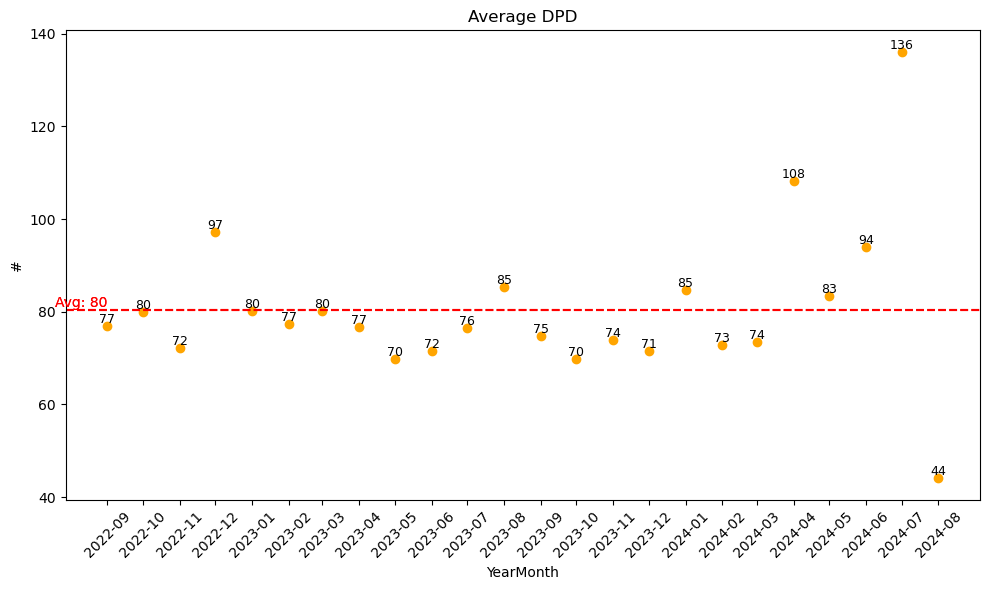

In [37]:
plt.figure(figsize=(10, 6))  # Make the figure wider
plt.scatter(df_dpd['year_month_date'], df_dpd['dpd'], color='orange')

# Add labels and title
plt.xlabel('YearMonth')
plt.ylabel('#')
plt.title('Average DPD')

# Rotate x-axis labels for better readability (optional)

x_labels = df_dpd['year_month_date'].dt.strftime('%Y-%m-%d')  # Format as string
short_x_labels = x_labels.str.slice(0, 7)  # Get the first 6 letters

plt.xticks(df_dpd['year_month_date'], short_x_labels, rotation=45)


# Annotate each point with its y-value (dpd)
for i, value in enumerate(df_dpd['dpd']):
    plt.text(df_dpd['year_month_date'][i], df_dpd['dpd'][i], 
             f'{value:,.0f}', ha='center', va='bottom', fontsize=9)

plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average DPD: {df_average:,.0f}')

plt.text(df_dpd['year_month_date'].min(), df_average, f'Avg: {df_average:,.0f}', 
         color='red', va='bottom', ha='right', fontsize=10)

plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average DPD: {df_average:,.0f}')

plt.text(df_dpd['year_month_date'].min(), df_average, f'Avg: {df_average:,.0f}', 
         color='red', va='bottom', ha='right', fontsize=10)

# Show plot
plt.tight_layout()  # To make sure labels are not cut off
plt.show()

In [38]:
###Around average, besides last months

In [39]:
###DCA PLacement

In [40]:

df_dca=df.groupby('year_month_date')[['dca_placement']].mean().reset_index().copy()

In [41]:
df_average = df_dca['dca_placement'].mean()

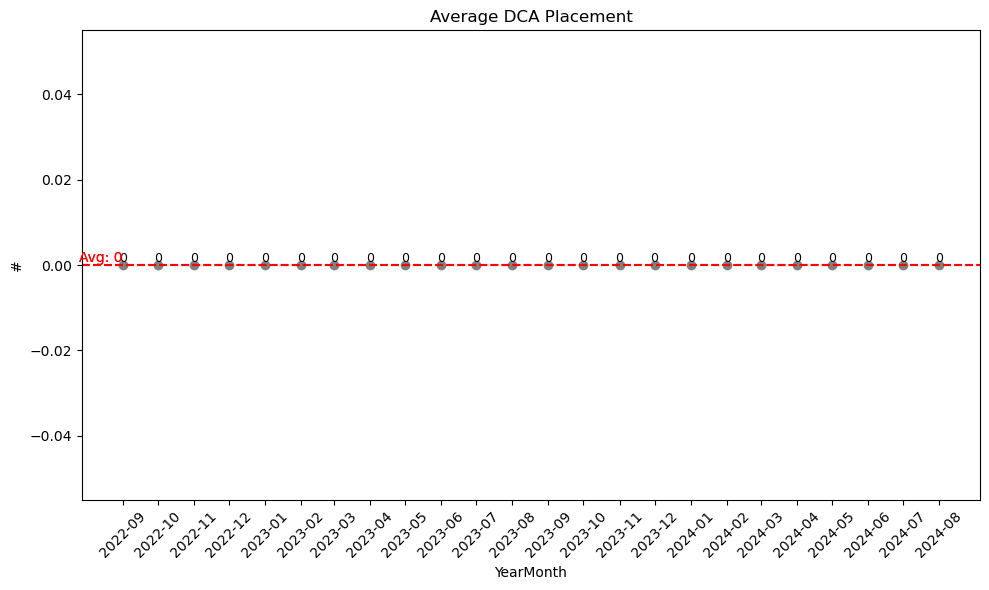

In [42]:
plt.figure(figsize=(10, 6))  # Make the figure wider
plt.scatter(df_dca['year_month_date'], df_dca['dca_placement'], color='gray')

# Add labels and title
plt.xlabel('YearMonth')
plt.ylabel('#')
plt.title('Average DCA Placement')

# Rotate x-axis labels for better readability (optional)

x_labels = df_dca['year_month_date'].dt.strftime('%Y-%m-%d')  # Format as string
short_x_labels = x_labels.str.slice(0, 7)  # Get the first 6 letters

plt.xticks(df_dca['year_month_date'], short_x_labels, rotation=45)


# Annotate each point with its y-value (dca_placement)
for i, value in enumerate(df_dca['dca_placement']):
    plt.text(df_dca['year_month_date'][i], df_dca['dca_placement'][i], 
             f'{value:,.0f}', ha='center', va='bottom', fontsize=9)

plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average DPD: {df_average:,.0f}')

plt.text(df_dca['year_month_date'].min(), df_average, f'Avg: {df_average:,.0f}', 
         color='red', va='bottom', ha='right', fontsize=10)

plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average DPD: {df_average:,.0f}')

plt.text(df_dca['year_month_date'].min(), df_average, f'Avg: {df_average:,.0f}', 
         color='red', va='bottom', ha='right', fontsize=10)

# Show plot
plt.tight_layout()  # To make sure labels are not cut off
plt.show()

In [43]:
###zero

In [44]:
### Amount of accounts

In [45]:
df_accounts=df.groupby('year_month_date')[['ak_id']].count().reset_index().copy()

In [46]:
df_average = df_accounts['ak_id'].mean()

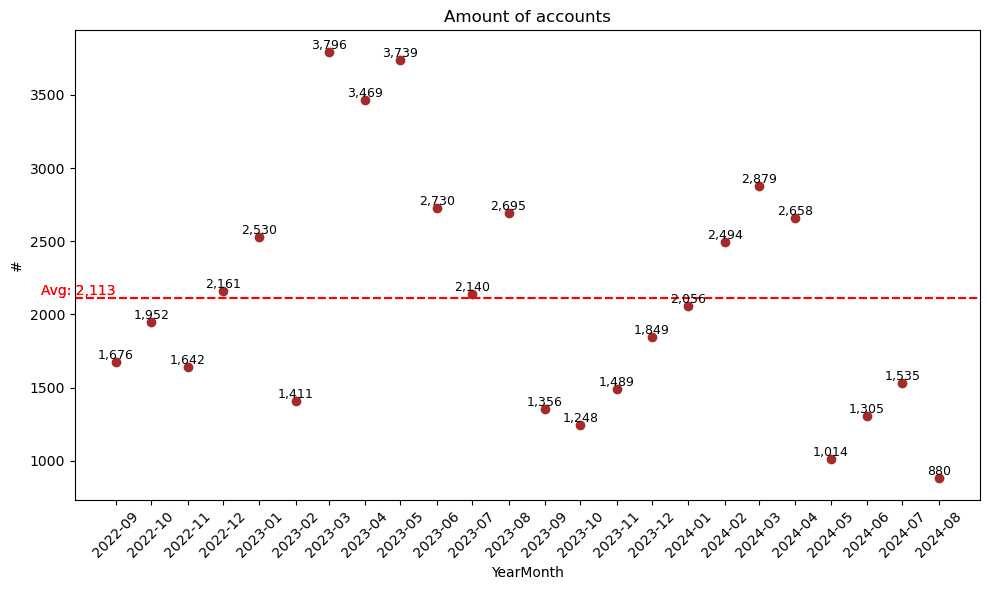

In [47]:
plt.figure(figsize=(10, 6))  # Make the figure wider
plt.scatter(df_accounts['year_month_date'], df_accounts['ak_id'], color='brown')

# Add labels and title
plt.xlabel('YearMonth')
plt.ylabel('#')
plt.title('Amount of accounts')

# Rotate x-axis labels for better readability (optional)

x_labels = df_accounts['year_month_date'].dt.strftime('%Y-%m-%d')  # Format as string
short_x_labels = x_labels.str.slice(0, 7)  # Get the first 6 letters

plt.xticks(df_accounts['year_month_date'], short_x_labels, rotation=45)


# Annotate each point with its y-value (ak_id)
for i, value in enumerate(df_accounts['ak_id']):
    plt.text(df_accounts['year_month_date'][i], df_accounts['ak_id'][i], 
             f'{value:,.0f}', ha='center', va='bottom', fontsize=9)

plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average DPD: {df_average:,.0f}')

plt.text(df_accounts['year_month_date'].min(), df_average, f'Avg: {df_average:,.0f}', 
         color='red', va='bottom', ha='right', fontsize=10)

plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average DPD: {df_average:,.0f}')

plt.text(df_accounts['year_month_date'].min(), df_average, f'Avg: {df_average:,.0f}', 
         color='red', va='bottom', ha='right', fontsize=10)

# Show plot
plt.tight_layout()  # To make sure labels are not cut off
plt.show()

In [48]:
# last months less accounts

In [60]:
######## Data from Pre-processing features

In [116]:
query_bq_feat="SELECT display_name, ak_id \
,SPLIT(display_name, ' ')[OFFSET(0)] AS counterparty ,SPLIT(display_name, ' ')[OFFSET(1)] AS country \
,SPLIT(display_name, ' ')[OFFSET(2)] AS month_text ,SPLIT(display_name, ' ')[OFFSET(3)] AS year \
,paid_last_12_months \
,phone_flag \
,phone_val \
,email_flag \
,email_val \
FROM `data-team-318806.books_db.preprocessed_features`  \
where 1=1 \
and lower(display_name) like '%moneyspot%' \
and lower(display_name) like '%au%'  \
and lower(display_name) not like '%bacbook%' \
and lower(display_name) not like '%test_10_docker%' \
and lower(display_name) not like '%backbook%'"

In [118]:
df_feat = pandas_gbq.read_gbq(query_bq_feat
                        ,project_id="data-team-318806")

Downloading: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████|


In [120]:
df_feat['month_number'] = df_feat['month_text'].map(month_mapping)
df_feat['month_number']=df_feat['month_number'].astype(int)
df_feat['year']=df_feat['year'].astype(int)
df_feat['yearmonth']=df_feat['year'].astype(int)*100+df_feat['month_number'].astype(int)
df_feat['year_month_date'] = pd.to_datetime(df_feat['year'].astype(str) + '-' + df_feat['month_number'].astype(str) + '-01')

In [124]:
df_accounts_feat=df_feat.groupby('year_month_date')[['ak_id']].count().reset_index().copy()

In [126]:
#### paid_last_12_months




df_paid=df_feat.groupby('year_month_date')[['paid_last_12_months']].sum().reset_index().copy()
df_paid=pd.merge(df_paid,df_accounts_feat,how='left',on='year_month_date')
df_paid['weight']=df_paid['paid_last_12_months']/df_paid['ak_id']
df_average = df_paid['weight'].mean()


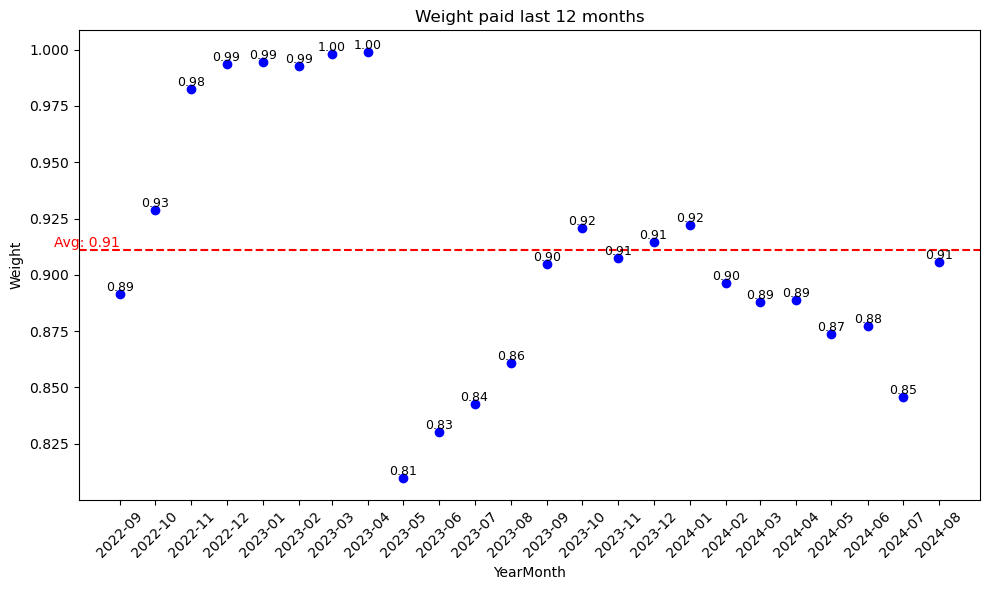

In [128]:
plt.figure(figsize=(10, 6))  # Make the figure wider
plt.scatter(df_paid['year_month_date'], df_paid['weight'], color='blue')

# Add labels and title
plt.xlabel('YearMonth')
plt.ylabel('Weight')
plt.title('Weight paid last 12 months')

# Rotate x-axis labels for better readability (optional)

x_labels = df_paid['year_month_date'].dt.strftime('%Y-%m-%d')  # Format as string
short_x_labels = x_labels.str.slice(0, 7)  # Get the first 6 letters

plt.xticks(df_paid['year_month_date'], short_x_labels, rotation=45)


# Annotate each point with its y-value (weight)
for i, value in enumerate(df_paid['weight']):
    plt.text(df_paid['year_month_date'][i], df_paid['weight'][i], 
             f'{value:,.2f}', ha='center', va='bottom', fontsize=9)


plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average: {df_average:,.2f}')

plt.text(df_paid['year_month_date'].min(), df_average, f'Avg: {df_average:,.2f}', 
         color='red', va='bottom', ha='right', fontsize=10)

# Show plot
plt.tight_layout()  # To make sure labels are not cut off
plt.show()

In [ ]:
### 3 groups

In [ ]:
####Phone_flag

In [132]:

df_p_flag=df_feat.groupby('year_month_date')[['phone_flag']].sum().reset_index().copy()
df_p_flag=pd.merge(df_p_flag,df_accounts_feat,how='left',on='year_month_date')
df_p_flag['weight']=df_p_flag['phone_flag']/df_p_flag['ak_id']
df_average = df_p_flag['weight'].mean()

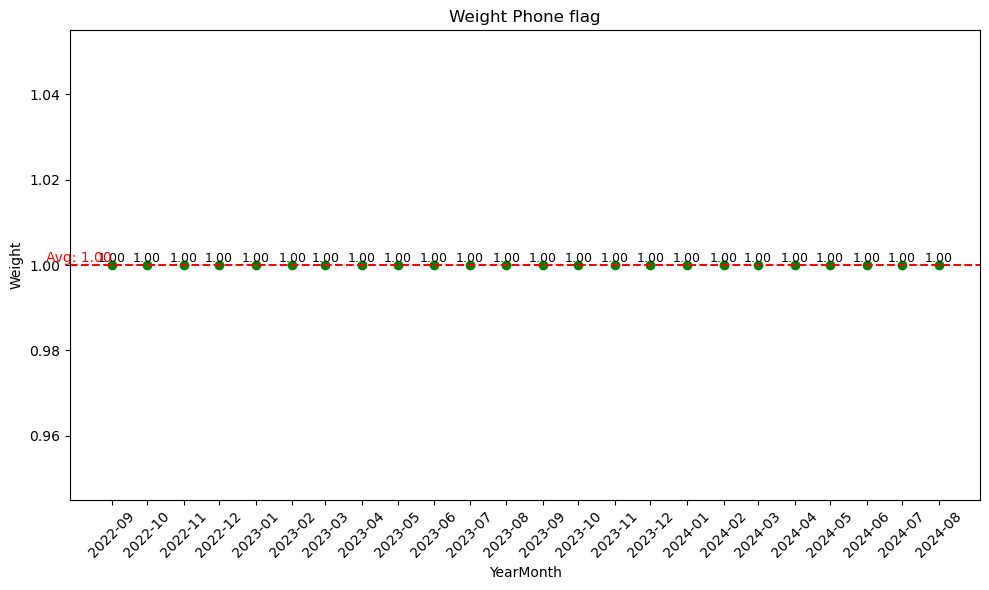

In [138]:


df_p_flag=df_feat.groupby('year_month_date')[['phone_flag']].sum().reset_index().copy()
df_p_flag=pd.merge(df_p_flag,df_accounts_feat,how='left',on='year_month_date')
df_p_flag['weight']=df_p_flag['phone_flag']/df_p_flag['ak_id']
df_average = df_p_flag['weight'].mean()




plt.figure(figsize=(10, 6))  # Make the figure wider
plt.scatter(df_p_flag['year_month_date'], df_p_flag['weight'], color='green')

# Add labels and title
plt.xlabel('YearMonth')
plt.ylabel('Weight')
plt.title('Weight Phone flag')

# Rotate x-axis labels for better readability (optional)

x_labels = df_p_flag['year_month_date'].dt.strftime('%Y-%m-%d')  # Format as string
short_x_labels = x_labels.str.slice(0, 7)  # Get the first 6 letters

plt.xticks(df_p_flag['year_month_date'], short_x_labels, rotation=45)


# Annotate each point with its y-value (weight)
for i, value in enumerate(df_p_flag['weight']):
    plt.text(df_p_flag['year_month_date'][i], df_p_flag['weight'][i], 
             f'{value:,.2f}', ha='center', va='bottom', fontsize=9)


plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average: {df_average:,.2f}')

plt.text(df_p_flag['year_month_date'].min(), df_average, f'Avg: {df_average:,.2f}', 
         color='red', va='bottom', ha='right', fontsize=10)

# Show plot
plt.tight_layout()  # To make sure labels are not cut off
plt.show()

In [140]:
####Phone valid

In [144]:
df_p_valid=df_feat.groupby('year_month_date')[['phone_val']].sum().reset_index().copy()
df_p_valid=pd.merge(df_p_valid,df_accounts_feat,how='left',on='year_month_date')
df_p_valid['weight']=df_p_valid['phone_val']/df_p_valid['ak_id']
df_average = df_p_valid['weight'].mean()

In [ ]:
####Removing 2022-09 and 2023-01: no data

In [170]:
df_p_valid=df_p_valid[(~df_p_valid.year_month_date.isin(['2022-09-01','2023-01-01']))]
df_average = df_p_valid['weight'].mean()

In [174]:
df_p_valid.reset_index(inplace=True)

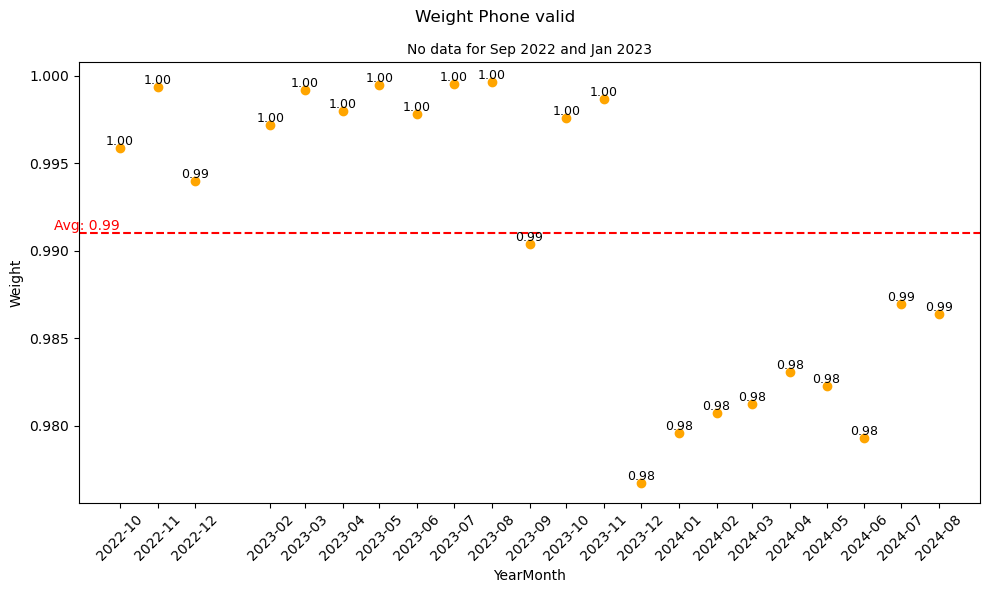

In [188]:
plt.figure(figsize=(10, 6))  # Make the figure wider
plt.scatter(df_p_valid['year_month_date'], df_p_valid['weight'], color='orange')

# Add labels and title
plt.xlabel('YearMonth')
plt.ylabel('Weight')
plt.suptitle('Weight Phone valid')
plt.title('No data for Sep 2022 and Jan 2023', fontsize=10)

# Rotate x-axis labels for better readability (optional)

x_labels = df_p_valid['year_month_date'].dt.strftime('%Y-%m-%d')  # Format as string
short_x_labels = x_labels.str.slice(0, 7)  # Get the first 6 letters

plt.xticks(df_p_valid['year_month_date'], short_x_labels, rotation=45)


# Annotate each point with its y-value (weight)
for i, value in enumerate(df_p_valid['weight']):
    plt.text(df_p_valid['year_month_date'][i], df_p_valid['weight'][i], 
             f'{value:,.2f}', ha='center', va='bottom', fontsize=9)


plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average: {df_average:,.2f}')

plt.text(df_p_valid['year_month_date'].min(), df_average, f'Avg: {df_average:,.2f}', 
         color='red', va='bottom', ha='right', fontsize=10)

# Show plot
plt.tight_layout()  # To make sure labels are not cut off
plt.show()

In [194]:
#Email flag


df_e_flag=df_feat.groupby('year_month_date')[['email_flag']].sum().reset_index().copy()
df_e_flag=pd.merge(df_e_flag,df_accounts_feat,how='left',on='year_month_date')
df_e_flag['weight']=df_e_flag['email_flag']/df_e_flag['ak_id']
df_average = df_e_flag['weight'].mean()

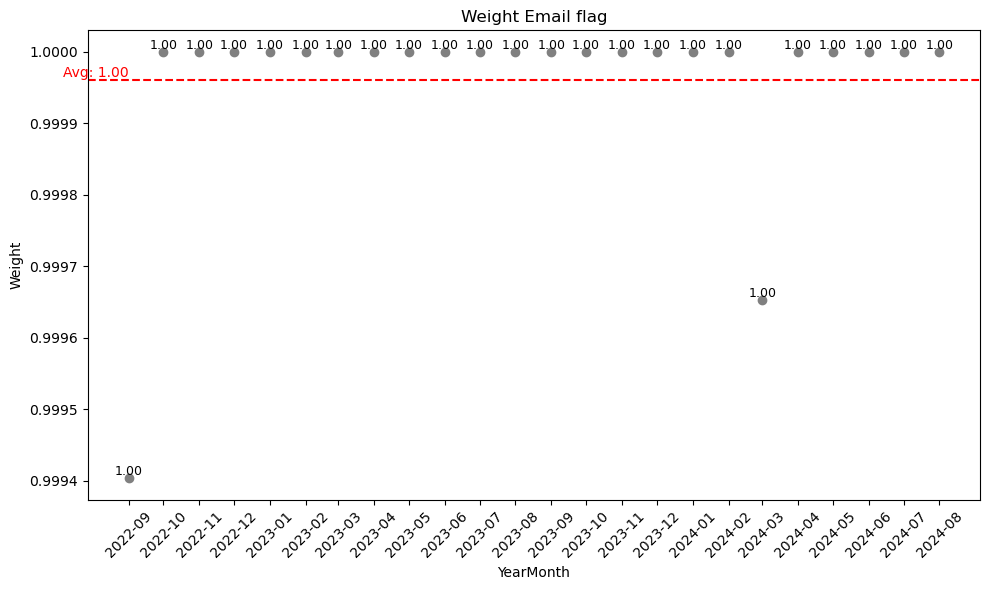

In [196]:
plt.figure(figsize=(10, 6))  # Make the figure wider
plt.scatter(df_e_flag['year_month_date'], df_e_flag['weight'], color='gray')

# Add labels and title
plt.xlabel('YearMonth')
plt.ylabel('Weight')
plt.title('Weight Email flag')

# Rotate x-axis labels for better readability (optional)

x_labels = df_e_flag['year_month_date'].dt.strftime('%Y-%m-%d')  # Format as string
short_x_labels = x_labels.str.slice(0, 7)  # Get the first 6 letters

plt.xticks(df_e_flag['year_month_date'], short_x_labels, rotation=45)


# Annotate each point with its y-value (weight)
for i, value in enumerate(df_e_flag['weight']):
    plt.text(df_e_flag['year_month_date'][i], df_e_flag['weight'][i], 
             f'{value:,.2f}', ha='center', va='bottom', fontsize=9)


plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average: {df_average:,.2f}')

plt.text(df_e_flag['year_month_date'].min(), df_average, f'Avg: {df_average:,.2f}', 
         color='red', va='bottom', ha='right', fontsize=10)

# Show plot
plt.tight_layout()  # To make sure labels are not cut off
plt.show()

In [198]:
### Email Valid

df_e_valid=df_feat.groupby('year_month_date')[['email_val']].sum().reset_index().copy()
df_e_valid=pd.merge(df_e_valid,df_accounts_feat,how='left',on='year_month_date')
df_e_valid['weight']=df_e_valid['email_val']/df_e_valid['ak_id']
df_average = df_e_valid['weight'].mean()

In [209]:
####Removing 2022-09: no data

df_e_valid=df_e_valid[(~df_e_valid.year_month_date.isin(['2022-09-01']))]
df_average = df_e_valid['weight'].mean()
df_e_valid.reset_index(inplace=True)

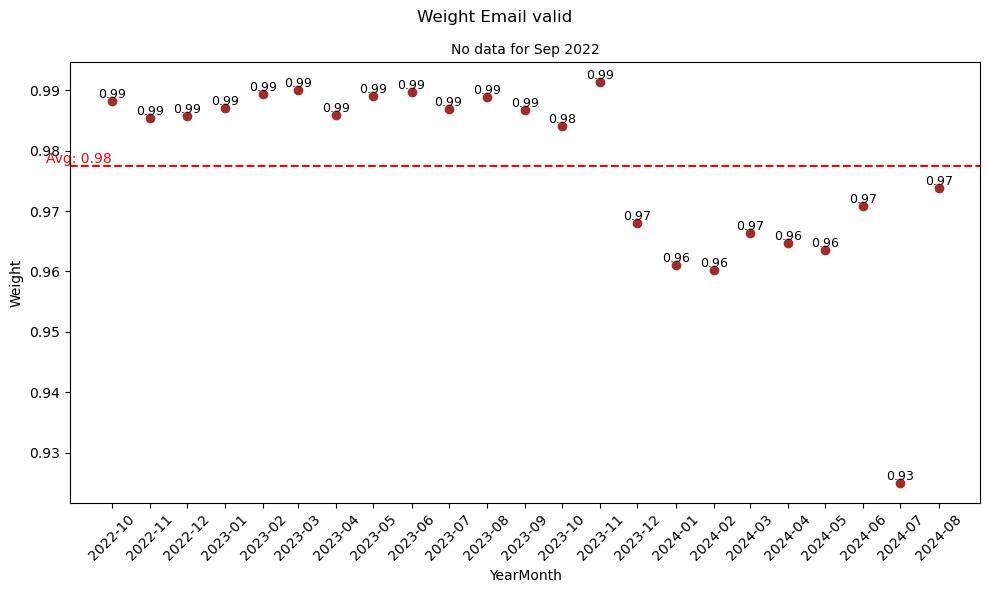

In [213]:
plt.figure(figsize=(10, 6))  # Make the figure wider
plt.scatter(df_e_valid['year_month_date'], df_e_valid['weight'], color='brown')

# Add labels and title
plt.xlabel('YearMonth')
plt.ylabel('Weight')
plt.suptitle('Weight Email valid')
plt.title('No data for Sep 2022', fontsize=10)

# Rotate x-axis labels for better readability (optional)

x_labels = df_e_valid['year_month_date'].dt.strftime('%Y-%m-%d')  # Format as string
short_x_labels = x_labels.str.slice(0, 7)  # Get the first 6 letters

plt.xticks(df_e_valid['year_month_date'], short_x_labels, rotation=45)


# Annotate each point with its y-value (weight)
for i, value in enumerate(df_e_valid['weight']):
    plt.text(df_e_valid['year_month_date'][i], df_e_valid['weight'][i], 
             f'{value:,.2f}', ha='center', va='bottom', fontsize=9)


plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average: {df_average:,.2f}')

plt.text(df_e_valid['year_month_date'].min(), df_average, f'Avg: {df_average:,.2f}', 
         color='red', va='bottom', ha='right', fontsize=10)

# Show plot
plt.tight_layout()  # To make sure labels are not cut off
plt.show()

In [ ]:
#########################################################################################################

## Performance Analysis

In [ ]:
###On Anaconda connect:
### gcloud auth application-default login

In [13]:
from google.cloud import bigquery
# from google.colab import data_table
import bigframes.pandas as bpd

project = 'data-team-318806' # Project ID inserted based on the query results selected to explore
location = 'EU' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
# data_table.enable_dataframe_formatter()

In [17]:
job = client.get_job('bquxjob_626eb6c6_1926b0a5784') 
# print(job.query)

In [19]:
destination = job.destination

In [21]:
bq_df = bpd.read_gbq(f"{destination.project}.{destination.dataset_id}.{destination.table_id}")

In [41]:
df_performance = bq_df.to_pandas()

In [47]:
df_performance.head()

,book_id,display_name,yearmonth,m1_actual,m3_actual,m6_actual,target1,target3,target6,m1_performance,m3_performance,m6_performance
0,5332570233,MoneySpot AU Oct 2023,2023-10,25432.71,52875.21,101175.39,7872.549954,23709.60638,49220.850137,3.230556,2.230118,2.055539
1,3987194246,MoneySpot AU Feb 2023,2023-02,26088.18,59524.13,94341.47,9998.532956,28220.724419,55930.555302,2.609201,2.109235,1.686761
2,4316536170,MoneySpot AU Apr 2023,2023-04,52474.6,130480.49,227110.99,20569.242668,61201.368169,123851.426754,2.55112,2.131986,1.833737
3,4145609685,MoneySpot AU Mar 2023,2023-03,17164.6,82573.79,162494.64,22493.663303,67168.784769,138539.881287,0.763086,1.229348,1.172909
4,6068749040,MoneySpot AU Feb 2024,2024-02,42082.89,129597.33,208253.51,26486.313619,74757.262969,148161.158753,1.588854,1.733575,1.405588


In [57]:
df_performance['year_month_date'] = pd.to_datetime(df_performance['yearmonth'])

In [ ]:
###M1 Performance

In [65]:
df_average = df_performance['m1_performance'].mean()

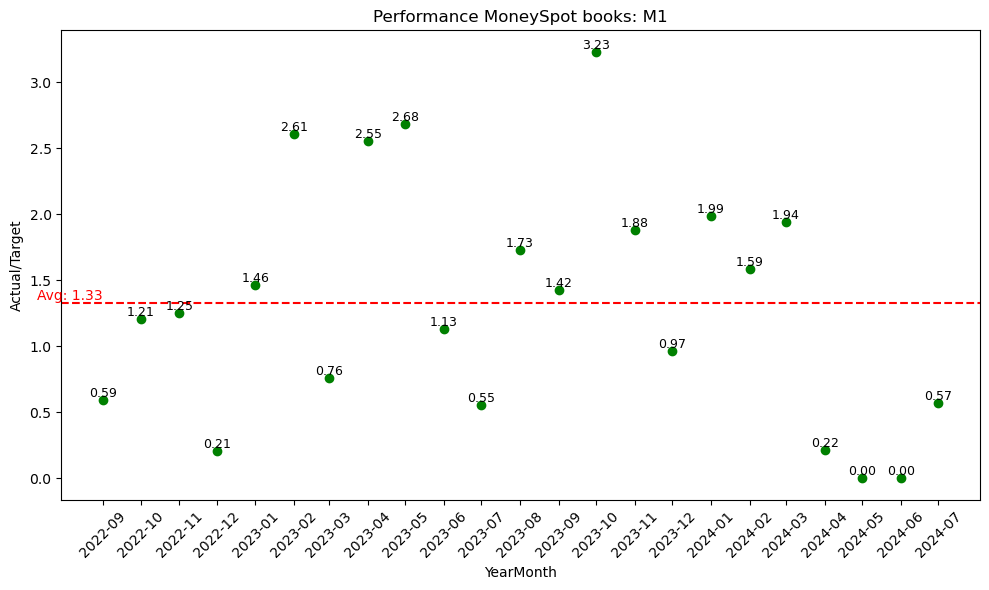

In [73]:
plt.figure(figsize=(10, 6))  # Make the figure wider
plt.scatter(df_performance['year_month_date'], df_performance['m1_performance'], color='green')

# Add labels and title
plt.xlabel('YearMonth')
plt.ylabel('Actual/Target')
plt.title('Performance MoneySpot books: M1', fontsize=12)

# Rotate x-axis labels for better readability (optional)

x_labels = df_performance['year_month_date'].dt.strftime('%Y-%m-%d')  # Format as string
short_x_labels = x_labels.str.slice(0, 7)  # Get the first 6 letters

plt.xticks(df_performance['year_month_date'], short_x_labels, rotation=45)


# Annotate each point with its y-value 
for i, value in enumerate(df_performance['m1_performance']):
    plt.text(df_performance['year_month_date'][i], df_performance['m1_performance'][i], 
             f'{value:,.2f}', ha='center', va='bottom', fontsize=9)


plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average: {df_average:,.2f}')

plt.text(df_performance['year_month_date'].min(), df_average, f'Avg: {df_average:,.2f}', 
         color='red', va='bottom', ha='right', fontsize=10)

# Show plot
plt.tight_layout()  
plt.show()

In [ ]:
###M3 Performance

In [75]:
df_average = df_performance['m3_performance'].mean()

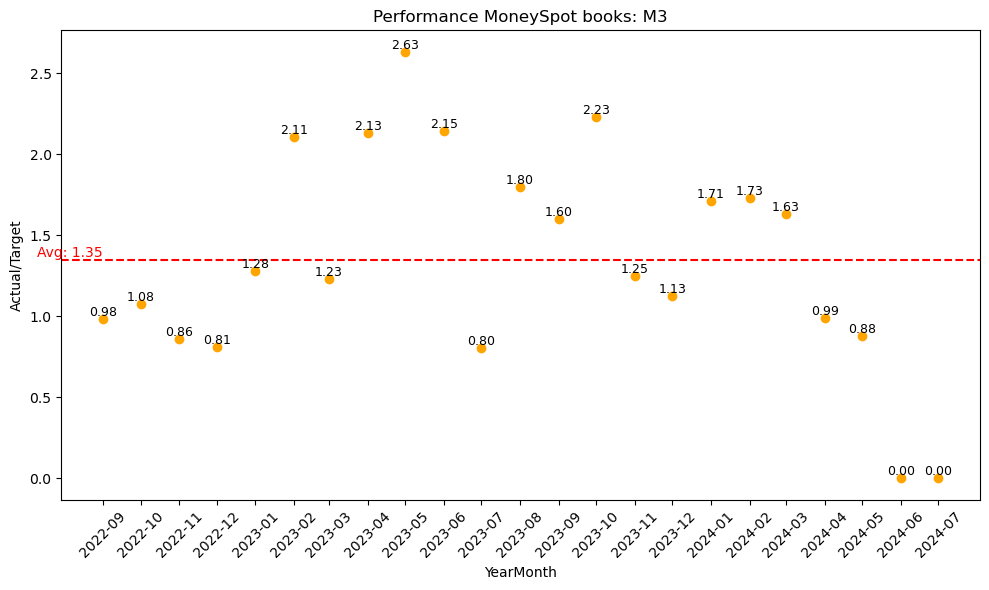

In [77]:
plt.figure(figsize=(10, 6))  # Make the figure wider
plt.scatter(df_performance['year_month_date'], df_performance['m3_performance'], color='orange')

# Add labels and title
plt.xlabel('YearMonth')
plt.ylabel('Actual/Target')
plt.title('Performance MoneySpot books: M3', fontsize=12)

# Rotate x-axis labels for better readability (optional)

x_labels = df_performance['year_month_date'].dt.strftime('%Y-%m-%d')  # Format as string
short_x_labels = x_labels.str.slice(0, 7)  # Get the first 6 letters

plt.xticks(df_performance['year_month_date'], short_x_labels, rotation=45)


# Annotate each point with its y-value 
for i, value in enumerate(df_performance['m3_performance']):
    plt.text(df_performance['year_month_date'][i], df_performance['m3_performance'][i], 
             f'{value:,.2f}', ha='center', va='bottom', fontsize=9)


plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average: {df_average:,.2f}')

plt.text(df_performance['year_month_date'].min(), df_average, f'Avg: {df_average:,.2f}', 
         color='red', va='bottom', ha='right', fontsize=10)

# Show plot
plt.tight_layout()  
plt.show()

In [79]:
###M6 Performance

In [81]:
df_average = df_performance['m6_performance'].mean()

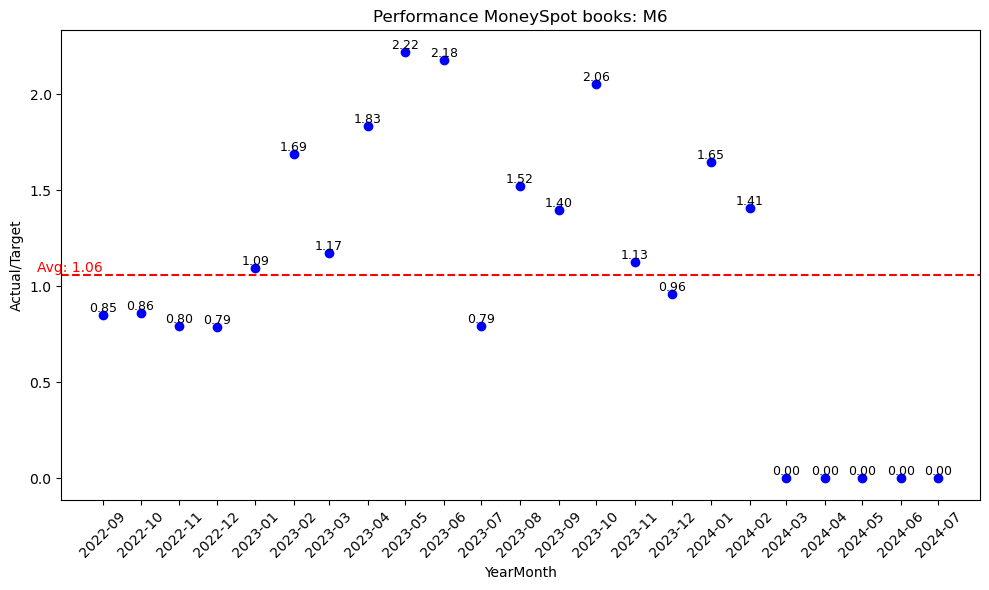

In [83]:
plt.figure(figsize=(10, 6))  # Make the figure wider
plt.scatter(df_performance['year_month_date'], df_performance['m6_performance'], color='blue')

# Add labels and title
plt.xlabel('YearMonth')
plt.ylabel('Actual/Target')
plt.title('Performance MoneySpot books: M6', fontsize=12)

# Rotate x-axis labels for better readability (optional)

x_labels = df_performance['year_month_date'].dt.strftime('%Y-%m-%d')  # Format as string
short_x_labels = x_labels.str.slice(0, 7)  # Get the first 6 letters

plt.xticks(df_performance['year_month_date'], short_x_labels, rotation=45)


# Annotate each point with its y-value 
for i, value in enumerate(df_performance['m6_performance']):
    plt.text(df_performance['year_month_date'][i], df_performance['m6_performance'][i], 
             f'{value:,.2f}', ha='center', va='bottom', fontsize=9)


plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average: {df_average:,.2f}')

plt.text(df_performance['year_month_date'].min(), df_average, f'Avg: {df_average:,.2f}', 
         color='red', va='bottom', ha='right', fontsize=10)

# Show plot
plt.tight_layout()  
plt.show()